In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
df=pd.read_csv('1730285881-Airbnb_Open_Data.csv',low_memory=False)

In [19]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [21]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [22]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [23]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules', 'license'], axis=1, inplace=True)
df['price']=df['price'].astype(str).str.replace('$','', regex=False)
df['service fee']=df['service fee'].astype(str).str.replace('$','', regex=False)
df['price']=df['price'].astype(str).str.replace(',','', regex=False)
df['service fee']=df['service fee'].astype(str).str.replace(',','', regex=False)
df.rename(columns={
    'price':'price_$',
    'service fee':'service fee_$'
}, inplace=True)
df.dropna(inplace= True)
df['price_$']=df['price_$'].astype(float)
df['service fee_$']=df['service fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)
df.loc[df['neighbourhood group']=='brookln', 'neighbourhood group']='Brooklyn'
df.drop(df[df['availability 365']>500].index)



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102038,57356923,HUGE BEDROOM LORIMER L TRAIN!!!,29320426760,unconfirmed,Jose,Brooklyn,Williamsburg,40.71355,-73.95003,United States,...,2016,570.0,NaN,28.0,17.0,2019-04-30,0.61,1.0,6.0,229.0
102039,57357476,Spacious two bedrooms condo in upper Manhattan,14430571516,verified,Max,Manhattan,Inwood,40.86461,-73.92363,United States,...,2003,665.0,NaN,2.0,49.0,2019-05-23,1.81,1.0,3.0,147.0
102040,57358028,"Room in Queens, NY, near LGA.",56457739998,verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,United States,...,2022,982.0,196.0,1.0,239.0,2019-06-29,8.58,2.0,2.0,361.0
102050,57363551,Sunny Brownstone Studio in BedStuy Brooklyn,11145329848,unconfirmed,Jamal,Brooklyn,Bedford-Stuyvesant,40.68221,-73.94618,United States,...,2016,NaN,NaN,2.0,104.0,2019-06-12,3.69,5.0,1.0,268.0


In [24]:
df.duplicated().value_counts()

,count
False,83819


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83819 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83819 non-null  object        
 1   NAME                            83819 non-null  object        
 2   host id                         83819 non-null  object        
 3   host_identity_verified          83819 non-null  object        
 4   host name                       83819 non-null  object        
 5   neighbourhood group             83819 non-null  object        
 6   neighbourhood                   83819 non-null  object        
 7   lat                             83819 non-null  float64       
 8   long                            83819 non-null  float64       
 9   country                         83819 non-null  object        
 10  country code                    83819 non-null  object        
 11  instan

In [26]:
df.describe()

,lat,long,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83819.000000,83819.000000,83819.000000,83619.000000,83590.000000,83819.000000,83819.000000,83819,83819.000000,83819.000000,83819.000000,83819.000000
mean,40.727358,-73.948500,2012.490175,626.352169,125.234370,7.435975,32.244276,2019-06-09 15:43:39.372695808,1.375849,3.278922,7.049619,141.797588
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056315,0.050343,5.760844,331.796822,66.355318,28.119420,51.905674,NaN,1.749398,1.283652,29.564680,133.956094


In [27]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44370
Private room,37684
Shared room,1655
Hotel room,110


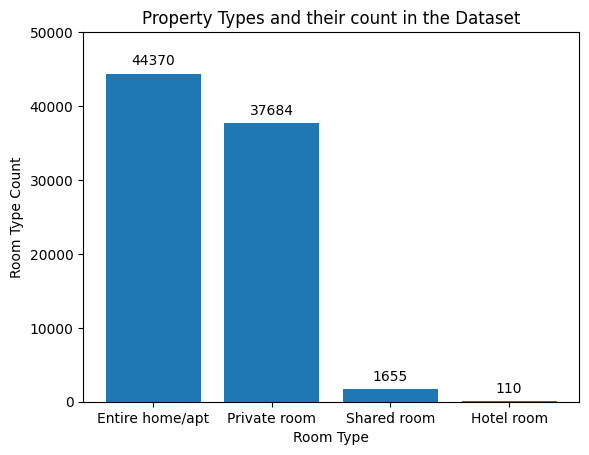

In [28]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [29]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34794
Manhattan,34742
Queens,11186
Bronx,2276
Staten Island,821


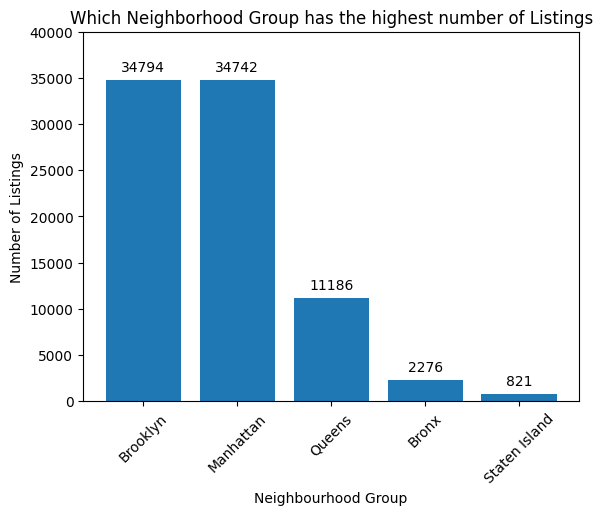

In [30]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighborhood Group has the highest number of Listings');

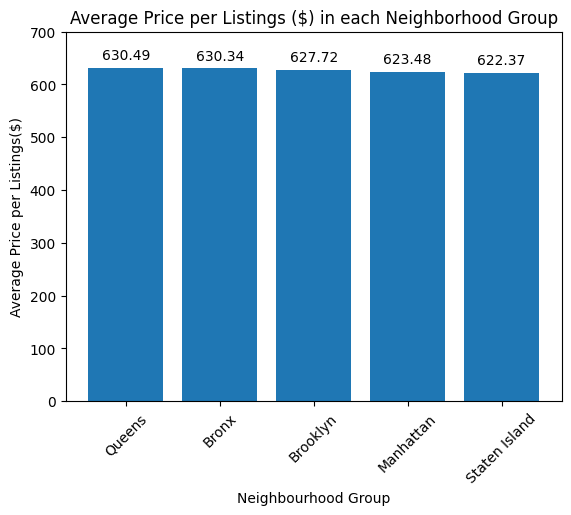

In [31]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels= round(avg_price.loc[:,"price_$"], 2), label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listings($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');


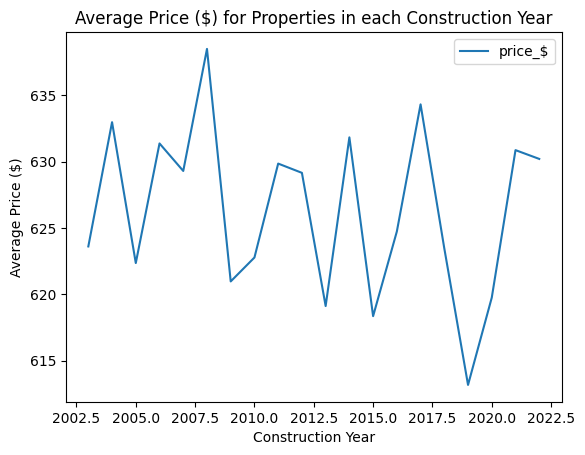

In [32]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');


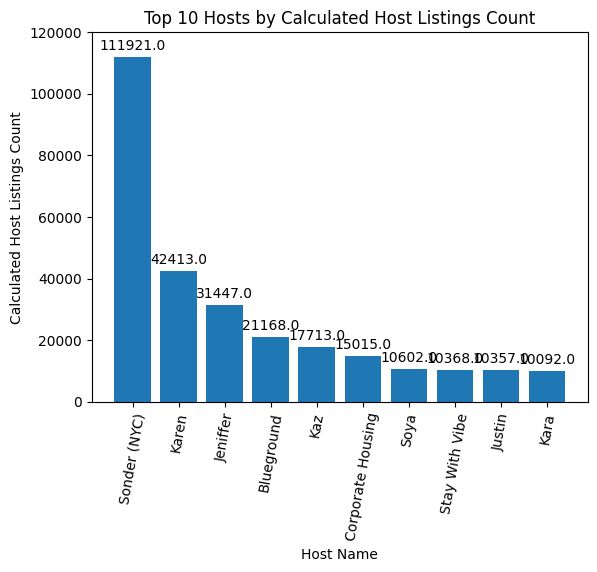

In [33]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, labels=hosts.loc[:,'calculated host listings count'],padding=3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

In [34]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284016
unconfirmed,3.273831


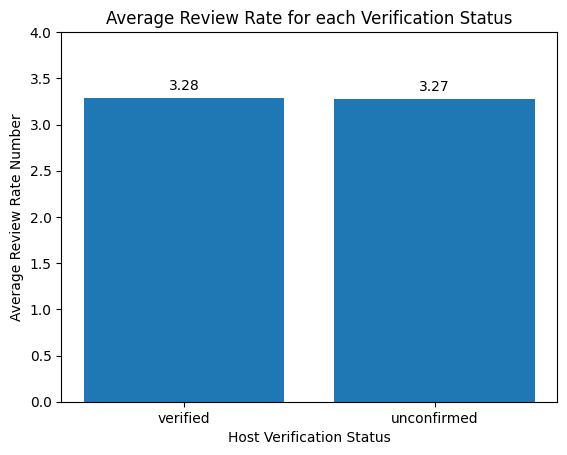

In [35]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number']);
plt.bar_label(review_bar, labels= round(review.loc[:,'review rate number'], 2), label_type='edge',padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

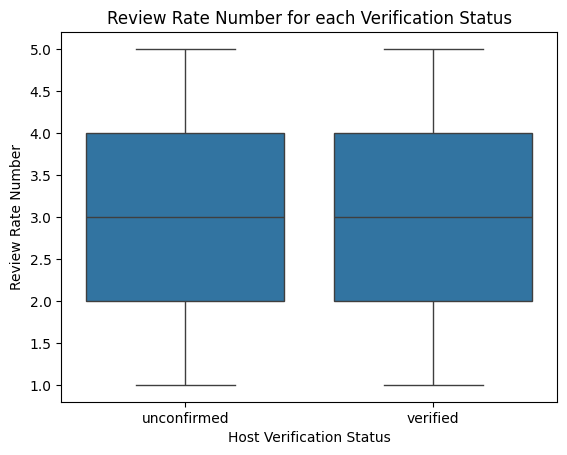

In [36]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Review Rate Number for each Verification Status');

In [37]:
df['price_$'].corr(df['service fee_$'])

np.float64(0.999990907729146)

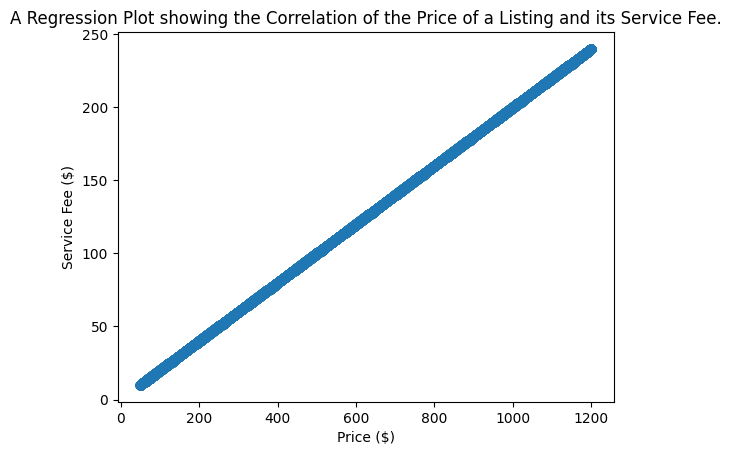

In [38]:
sns.regplot(data=df, x='price_$', y='service fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [39]:
ARRN=df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.322368
Manhattan           Entire home/apt            3.269024
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

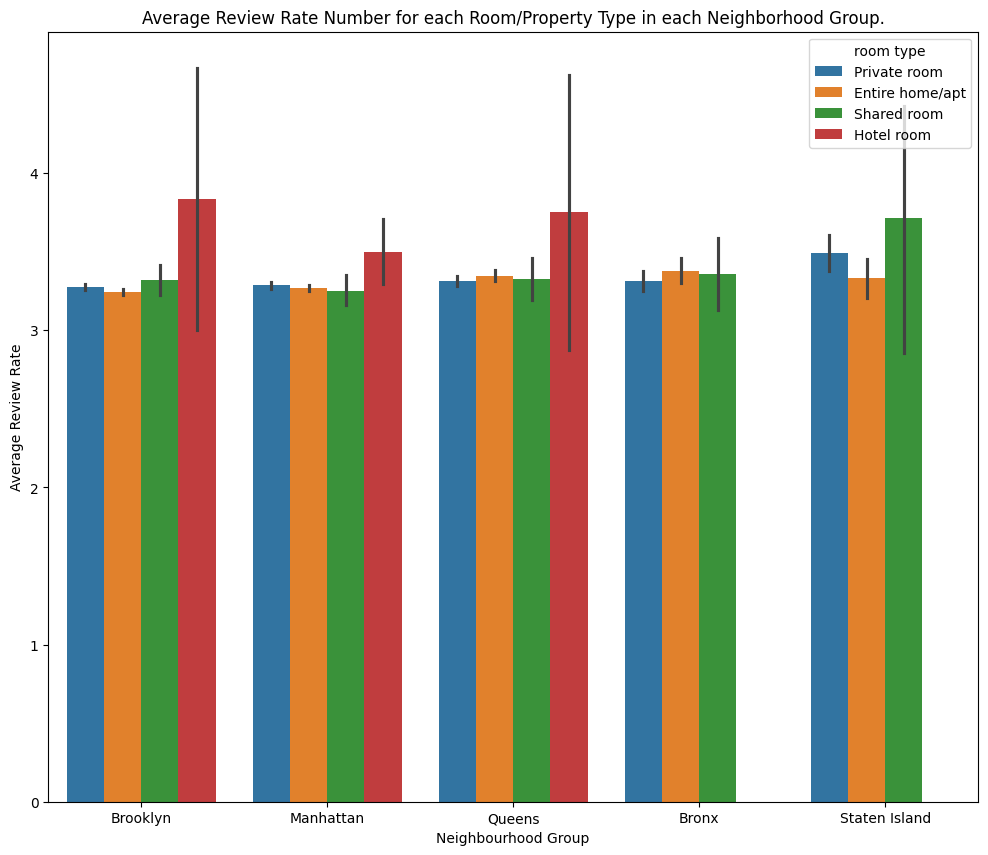

In [40]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate Number for each Room/Property Type in each Neighborhood Group.');

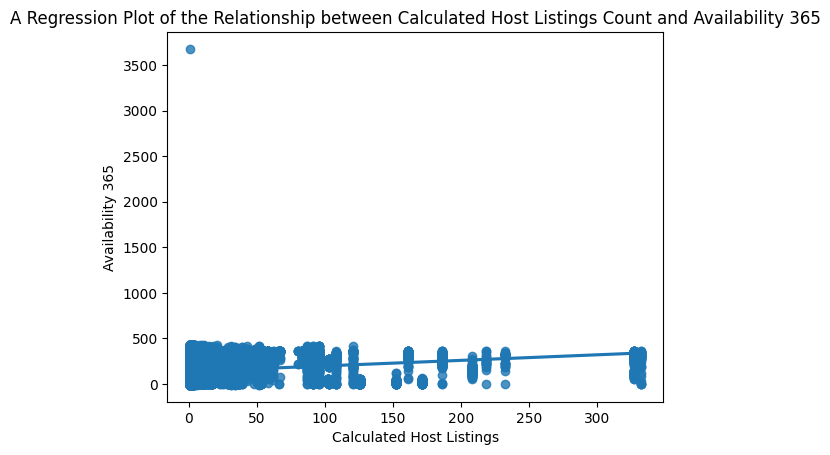

In [41]:
sns.regplot(df, x ='calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [42]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13469788228165563)